In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
EPISODES = 1000
INT_MIN = -99999

In [116]:
class Qlearning:
    def __init__(self, N = 10, M = 20, ALPHA = 0.8, LAMBDA = 0.8):
        self.N = N
        self.M = M
        self.SIZE = N*N
        self.MAX_STEPS = self.SIZE 
        self.ALPHA = ALPHA
        self.LAMBDA = LAMBDA
        #Q(s, a) matrix which is initially zero and of size N X N X 4
        #there are four actions right left up down
        #action right  = 0, down  = 1, left = 2, up = 3
        self.Q = np.zeros((N, N, 4))
        
    def randomly_initialize_matrix(self,seed=42):
        np.random.seed(seed)
        #making matrix representing hole and frozen lake
        #0 represent hole, 1 represent frozen lake, -1 represent start, -2 repesent terminal
        a = np.ones( self.SIZE - self.M - 2) #-2 for start and terminal
        b = np.zeros(self.M)
        c = np.hstack((a, b))
        np.random.shuffle(c)
        start = -1
        end = -2
        self.matrix = np.hstack((start, c, end)).reshape(self.N, self.N)
        return self.matrix
    
    def reward(self, ele):
        if ele == 0:
            return -100
        elif ele == 1 or ele == -1:
            return 0
        elif ele == -2:
            return 100
    #return statement right 0, down 1, left 2, up 3
    def chooseAction(self, statec):
        j = [1, 0, -1, 0]
        i = [0, 1, 0, -1]
        ls = []
        for k in range(4):
            idx = statec[0] + i[k]
            idy = statec[1] + j[k]
            #checking the range of indices in the matrix
            if(idx  >=0 and idx <=self.N-1 and idy >=0 and idy  <=self.N-1):
                ls.append(self.Q[idx, idy, k])
            else:
                ls.append(INT_MIN)
        return (statec[0] + i[np.argmax(ls)], statec[1] + j[np.argmax(ls)]), np.argmax(ls)
    
    def Qalgorithm(self):
        self.rewardList = []
        for epochs in range(EPISODES):
            #i, j represent indices
            statec = (0, 0)#current state
            total_reward = 0
            for steps in range(self.MAX_STEPS):
                #print(statec, total_reward)
                if(statec == (self.N-1, self.N-1)):
                    break
                #choose current action with maximum Q value
                statenew, actionc = self.chooseAction( statec)
                #print(statenew)
                stateflag, actionprime = self.chooseAction(statenew)
                #update the Q table
                first_part = (1-self.ALPHA)*self.Q[statec[0], statec[1], actionc]
                second_part = self.ALPHA*(self.reward(self.matrix[statenew[0], statenew[1]])   + self.LAMBDA*self.Q[statenew[0], statenew[1], actionprime])
                self.Q[statec[0], statec[1], actionc] =  first_part + second_part
                #adding reward
                total_reward += self.reward(self.matrix[statenew[0], statenew[1]])
                statec = statenew
            self.rewardList.append(total_reward)
            #print("Episode" , epochs , "Complete")
    
    #method for plotting rewards with the episodes
    def plotrewards(self, path):
        plt.plot(range(EPISODES)[0:100], self.rewardList[0:100])
        plt.xlabel("No of episodes")
        plt.ylabel("Total reward after each epoch")
        plt.savefig(path)
        plt.show()
    
    #printing optimal path after learning the algorithm
    def print_optimal_path(self):
        statec = (0, 0)#current state
        while(True):
            print(statec, end = "->")
            if(statec == (self.N-1, self.N-1)):
                break
            #choose current action with maximum Q value
            statenew, actionc = self.chooseAction( statec)
            statec = statenew

[[-1.  1.  1.  0.  0.  1.]
 [ 1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  0.  1.]
 [ 0.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  0. -2.]]
((0, 1), 0)


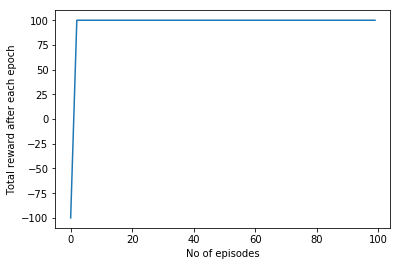

(0, 0)->(0, 1)->(1, 1)->(2, 1)->(2, 2)->(2, 3)->(2, 4)->(2, 5)->(3, 5)->(4, 5)->(5, 5)->

In [115]:
x =Qlearning(6,8, 0.8, 0.8)
print(x.randomly_initialize_matrix(42))
print(x.chooseAction((0, 0)))
x.Qalgorithm()
x.plotrewards('q-learning.jpg')
x.print_optimal_path()